# 1. Importing modules and reading data

In [1]:
import pandas as pd
import numpy as np
import os
from scipy import stats
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
# reading the train and test data
df_train = pd.read_csv("UNSW_NB15_training-set.csv")
df_test = pd.read_csv("UNSW_NB15_testing-set.csv")

In [3]:
#function to move the label (target variables to the last column)
def moveTarget(df, loc, columnName):
    colValue = df.pop(columnName)
    df.insert(loc, columnName, colValue)

In [4]:
df_train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [5]:
df_train.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


In [6]:
df_test.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [7]:
df_test.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,...,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,87671.000000,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,79.609567,7.345403e+07,...,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,0.680622
std,50616.731112,6.480249,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,102.940011,110.506863,1.883574e+08,...,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,0.466237
min,1.000000,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,43836.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,0.000000,1.305334e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,87671.000000,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796748e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,131506.000000,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,...,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,1.000000
max,175341.000000,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,...,51.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


# 2. Visualizing the data

## 2.(a). Histogram Plots

In [8]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Saving figure attribute_histogram_plots


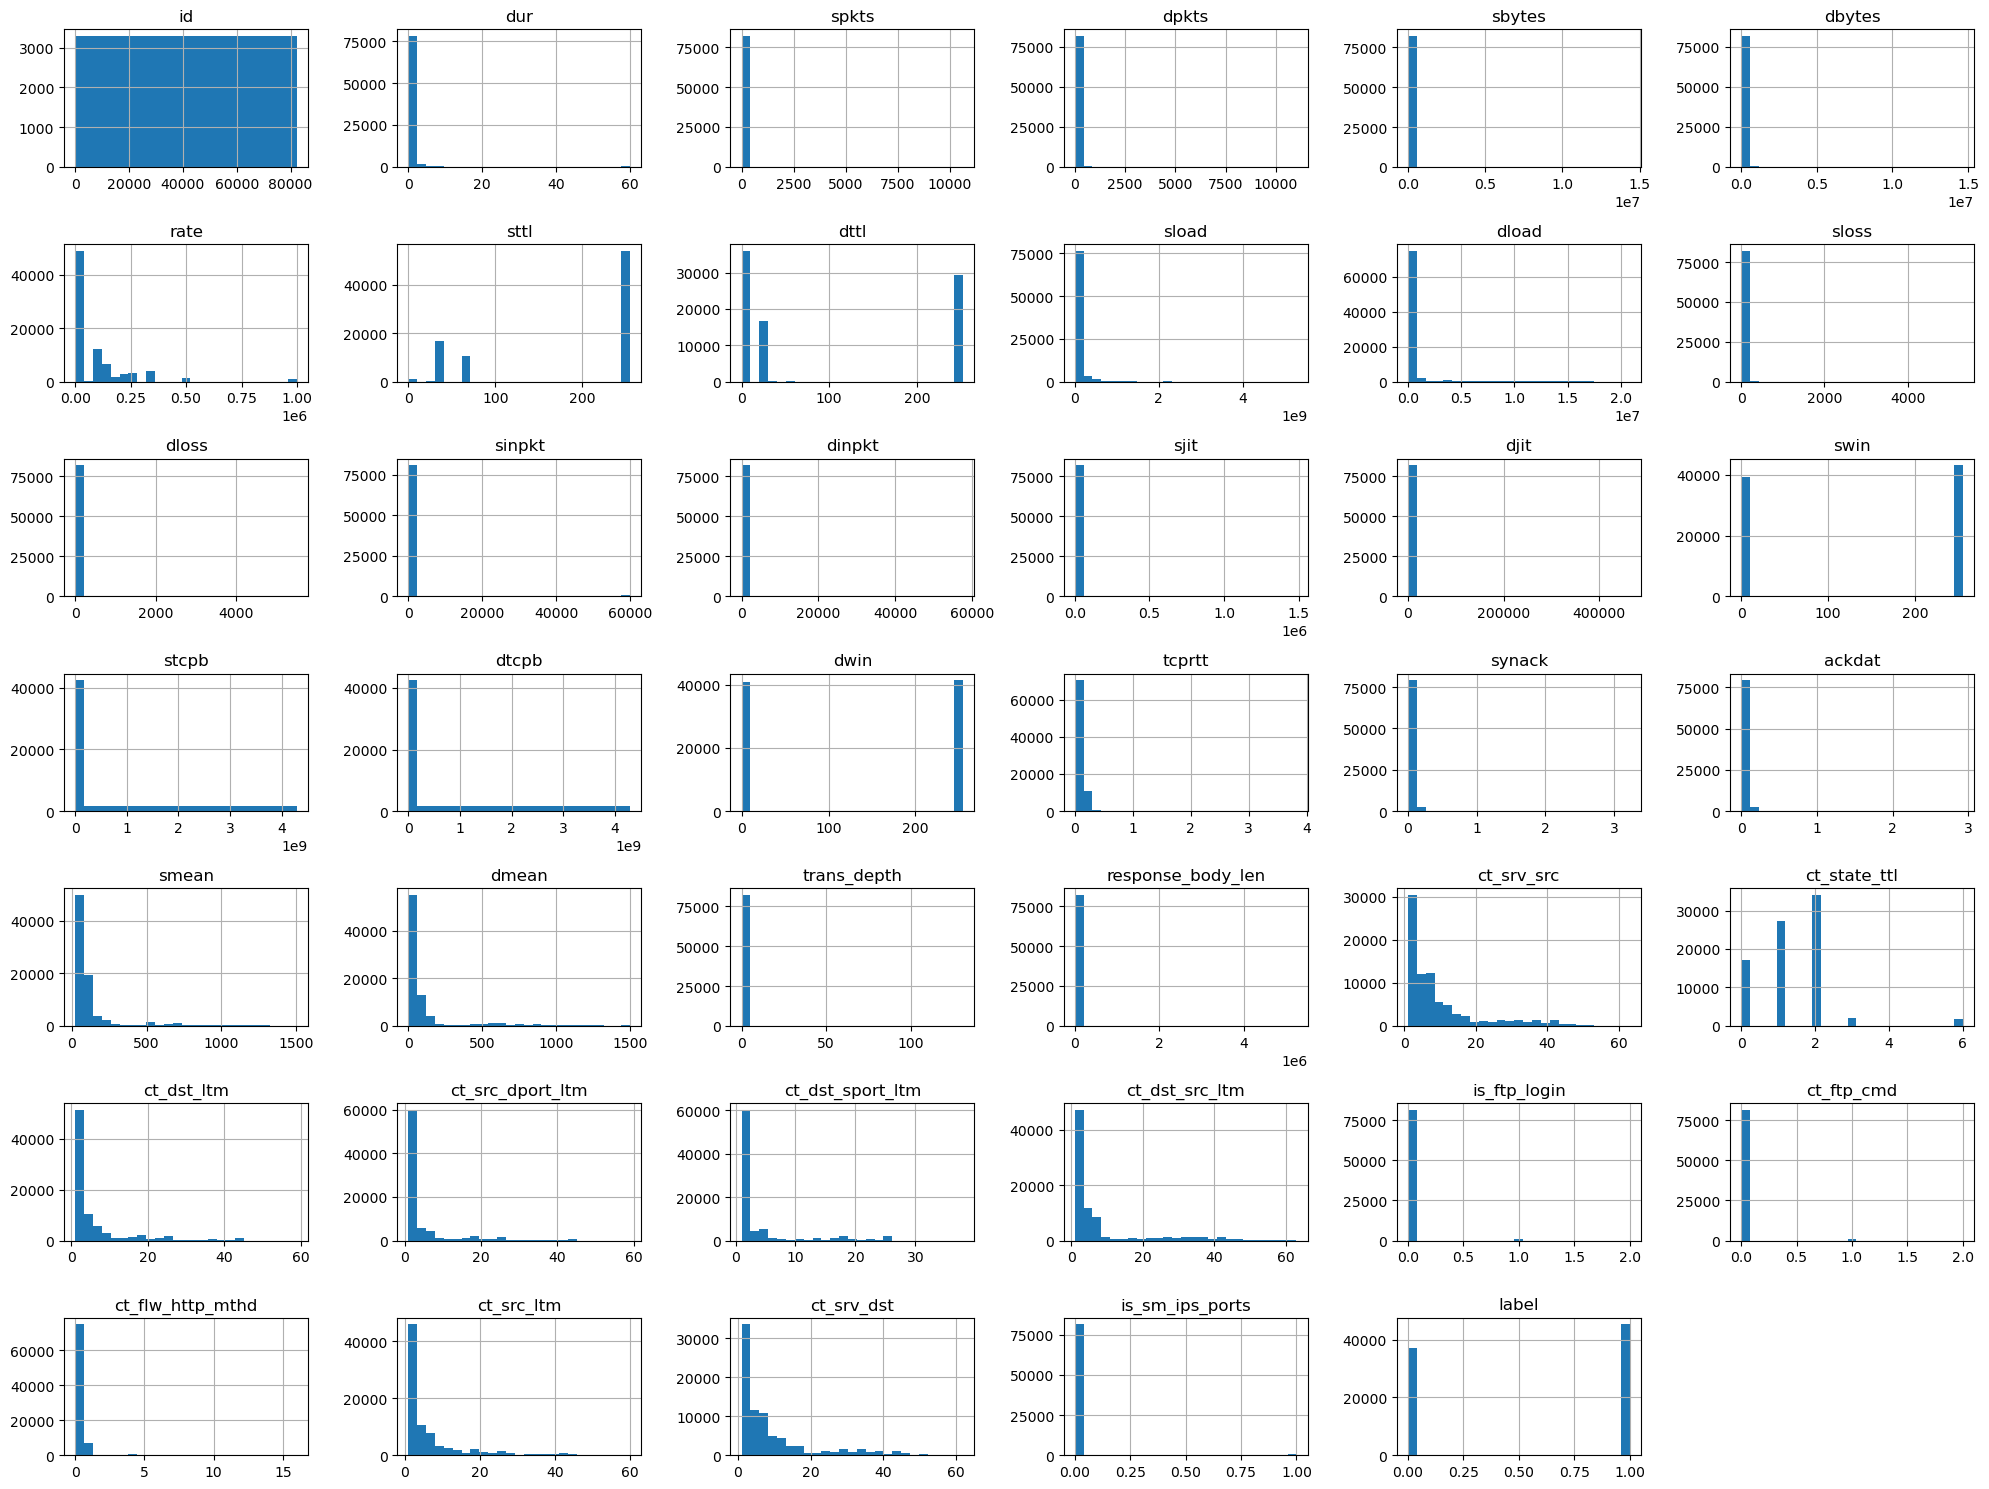

In [9]:
df_train.hist(bins=25, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

### 2.(b). Depicting the correlations between features

In [10]:
df_train.corr()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
id,1.000000,0.016037,-0.020766,-0.037020,-0.005647,-0.031115,-0.121700,0.095939,0.306539,-0.003063,...,-0.317444,-0.346396,-0.297913,-0.049584,-0.049279,0.035399,-0.345738,-0.275818,0.097736,-0.387489
dur,0.016037,1.000000,0.280239,0.217507,0.225432,0.172492,-0.118031,-0.000986,0.090048,-0.076343,...,-0.086880,-0.081637,-0.071127,0.015724,0.015547,0.018879,-0.080789,-0.091253,0.027472,-0.001145
spkts,-0.020766,0.280239,1.000000,0.369554,0.965750,0.198324,-0.068249,-0.092536,0.054601,-0.044194,...,-0.053109,-0.055095,-0.061852,0.010361,0.010423,0.000443,-0.049367,-0.058815,-0.013960,-0.027731
dpkts,-0.037020,0.217507,0.369554,1.000000,0.175834,0.976419,-0.083173,-0.163830,0.036483,-0.054145,...,-0.062549,-0.067452,-0.075012,0.012473,0.012555,0.021041,-0.057374,-0.063169,-0.016103,-0.061515
sbytes,-0.005647,0.225432,0.965750,0.175834,1.000000,0.010036,-0.025102,-0.017866,0.049891,-0.015228,...,-0.020586,-0.020451,-0.024065,-0.002572,-0.002569,-0.004626,-0.021540,-0.030049,-0.004910,0.020641
dbytes,-0.031115,0.172492,0.198324,0.976419,0.010036,1.000000,-0.047978,-0.114537,0.012537,-0.031266,...,-0.035335,-0.038965,-0.044048,-0.006521,-0.006498,0.022901,-0.033301,-0.034416,-0.009267,-0.032632
rate,-0.121700,-0.118031,-0.068249,-0.083173,-0.025102,-0.047978,1.000000,0.388155,-0.453913,0.550104,...,0.345573,0.366238,0.358902,-0.050093,-0.049952,-0.112432,0.327563,0.370816,-0.058689,0.328629
sttl,0.095939,-0.000986,-0.092536,-0.163830,-0.017866,-0.114537,0.388155,1.000000,-0.033338,0.252901,...,0.287568,0.315776,0.335118,-0.089618,-0.089897,-0.174840,0.236869,0.304131,-0.187933,0.504159
dttl,0.306539,0.090048,0.054601,0.036483,0.049891,0.012537,-0.453913,-0.033338,1.000000,-0.293939,...,-0.349865,-0.357793,-0.364181,0.052195,0.050854,0.208628,-0.403289,-0.454576,-0.087019,-0.098591
sload,-0.003063,-0.076343,-0.044194,-0.054145,-0.015228,-0.031266,0.550104,0.252901,-0.293939,1.000000,...,0.112361,0.083445,0.155386,-0.032551,-0.032464,-0.072814,0.110013,0.160250,-0.038030,0.124548


## 2.(c). Scatter Plot

### - Good Data

Saving figure diagram1


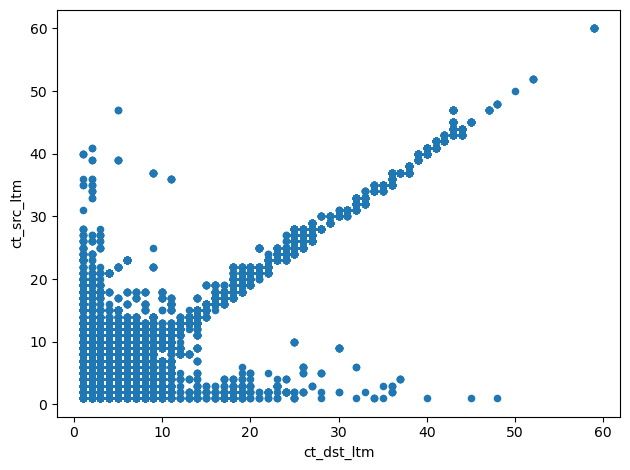

In [11]:
df_train.plot(kind='scatter', x='ct_dst_ltm', y='ct_src_ltm')
save_fig("diagram1")

Saving figure diagram2


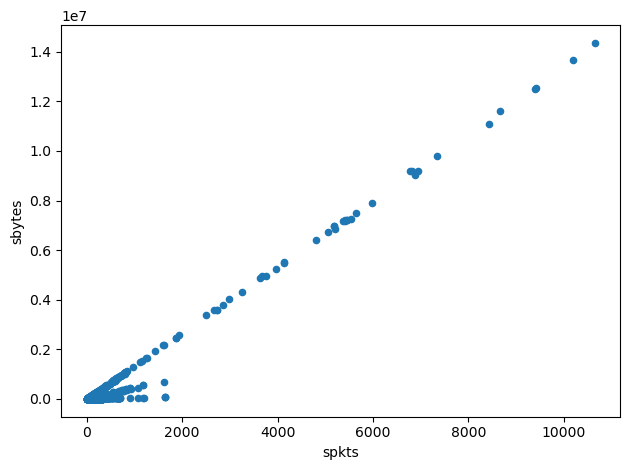

In [12]:
df_train.plot(kind='scatter', x='spkts', y='sbytes')
save_fig("diagram2")

Saving figure diagram3


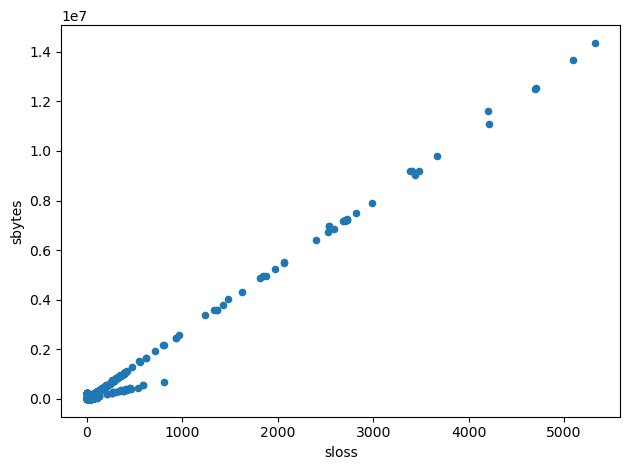

In [13]:
df_train.plot(kind='scatter', x='sloss', y='sbytes')
save_fig("diagram3")

### - Bad Data

Saving figure diagram4


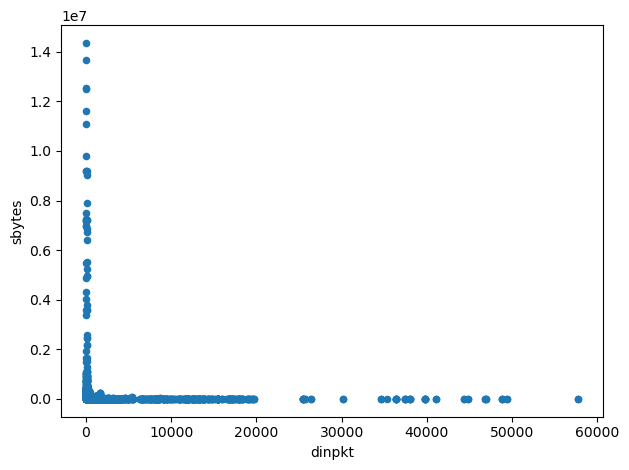

In [14]:
df_train.plot(kind='scatter', x='dinpkt', y='sbytes')
save_fig("diagram4")

Saving figure diagram5


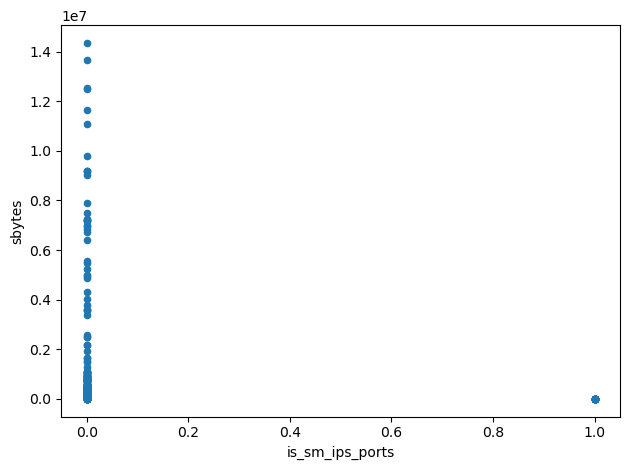

In [15]:
df_train.plot(kind='scatter', x='is_sm_ips_ports', y='sbytes')
save_fig("diagram5")

Saving figure diagram6


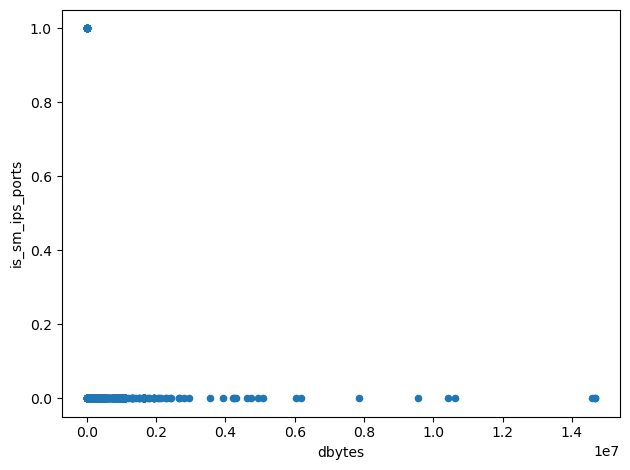

In [16]:
df_train.plot(kind='scatter', x='dbytes', y='is_sm_ips_ports')
save_fig("diagram6")

# 3. Data Cleaning and Pre-Processing

## 3.(a). Checking null values

In [17]:
df_train.isnull().any()

id                   False
dur                  False
proto                False
service              False
state                False
spkts                False
dpkts                False
sbytes               False
dbytes               False
rate                 False
sttl                 False
dttl                 False
sload                False
dload                False
sloss                False
dloss                False
sinpkt               False
dinpkt               False
sjit                 False
djit                 False
swin                 False
stcpb                False
dtcpb                False
dwin                 False
tcprtt               False
synack               False
ackdat               False
smean                False
dmean                False
trans_depth          False
response_body_len    False
ct_srv_src           False
ct_state_ttl         False
ct_dst_ltm           False
ct_src_dport_ltm     False
ct_dst_sport_ltm     False
ct_dst_src_ltm       False
i

In [18]:
df_test.isnull().any()

id                   False
dur                  False
proto                False
service              False
state                False
spkts                False
dpkts                False
sbytes               False
dbytes               False
rate                 False
sttl                 False
dttl                 False
sload                False
dload                False
sloss                False
dloss                False
sinpkt               False
dinpkt               False
sjit                 False
djit                 False
swin                 False
stcpb                False
dtcpb                False
dwin                 False
tcprtt               False
synack               False
ackdat               False
smean                False
dmean                False
trans_depth          False
response_body_len    False
ct_srv_src           False
ct_state_ttl         False
ct_dst_ltm           False
ct_src_dport_ltm     False
ct_dst_sport_ltm     False
ct_dst_src_ltm       False
i

## 3.(b). Removing Unnecessary Features



In [19]:
correlation = df_train.corr()
correlation["label"].sort_values(ascending = False)

label                1.000000
sttl                 0.504159
ct_dst_sport_ltm     0.393668
ct_src_dport_ltm     0.341513
rate                 0.328629
ct_state_ttl         0.318517
ct_srv_dst           0.292931
ct_srv_src           0.290195
ct_dst_src_ltm       0.279989
ct_src_ltm           0.276494
ct_dst_ltm           0.257995
sload                0.124548
sbytes               0.020641
sloss                0.006360
dur                 -0.001145
is_ftp_login        -0.016206
response_body_len   -0.016414
ct_ftp_cmd          -0.017138
trans_depth         -0.025804
djit                -0.027131
sjit                -0.027397
spkts               -0.027731
dbytes              -0.032632
dinpkt              -0.037585
dloss               -0.044399
smean               -0.061146
dpkts               -0.061515
ct_flw_http_mthd    -0.075028
dttl                -0.098591
is_sm_ips_ports     -0.117407
ackdat              -0.120522
sinpkt              -0.120768
tcprtt              -0.148800
synack    

In [20]:
df_train.dtypes

id                     int64
dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

In [21]:
df_train.drop(["proto", "state", "service", "id", "dur"], inplace=True, axis=1)
display(df_train)

,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,2,0,496,0,90909.090200,254,0,1.803636e+08,0.000000,0,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0,1762,0,125000.000300,254,0,8.810000e+08,0.000000,0,...,1,2,0,0,0,1,2,0,Normal,0
2,2,0,1068,0,200000.005100,254,0,8.544000e+08,0.000000,0,...,1,3,0,0,0,1,3,0,Normal,0
3,2,0,900,0,166666.660800,254,0,6.000000e+08,0.000000,0,...,1,3,0,0,0,2,3,0,Normal,0
4,2,0,2126,0,100000.002500,254,0,8.504000e+08,0.000000,0,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,2,0,104,0,200000.005100,254,0,8.320000e+07,0.000000,0,...,1,2,0,0,0,2,1,0,Normal,0
82328,20,8,18062,354,24.410067,254,252,1.241044e+05,2242.109863,7,...,1,1,0,0,0,3,2,0,Normal,0
82329,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,...,1,1,0,0,0,1,1,1,Normal,0
82330,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,...,1,1,0,0,0,1,1,1,Normal,0


In [22]:
df_test.drop(["proto", "state", "service", "id", "dur"], inplace=True, axis=1)
display(df_test)

,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,6,4,258,172,74.087490,252,254,1.415894e+04,8495.365234,0,...,1,1,0,0,0,1,1,0,Normal,0
1,14,38,734,42014,78.473372,62,252,8.395112e+03,503571.312500,2,...,1,2,0,0,0,1,6,0,Normal,0
2,8,16,364,13186,14.170161,62,252,1.572272e+03,60929.230470,1,...,1,3,0,0,0,2,6,0,Normal,0
3,12,12,628,770,13.677108,62,252,2.740179e+03,3358.622070,1,...,1,3,1,1,0,2,1,0,Normal,0
4,10,6,534,268,33.373826,254,252,8.561499e+03,3987.059814,2,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,...,13,24,0,0,0,24,24,0,Generic,1
175337,10,8,620,354,33.612649,254,252,8.826286e+03,4903.492188,2,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,...,3,13,0,0,0,3,12,0,Generic,1
175339,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,...,14,30,0,0,0,30,30,0,Generic,1


## 3.(c). One-Hot Encoder for Categorical Features



In [23]:
one_hot_train = pd.get_dummies(df_train["attack_cat"])

df_train = df_train.join(one_hot_train)

# Drop the attack_cat column (One-hot encode the attack_cat)
df_train.drop("attack_cat", inplace=True, axis=1)

# Move the target variable to the back of the dataframe
moveTarget(df_train, len(df_train.columns) - 1, "label")

display(df_train)

,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,...,Backdoor,DoS,Exploits,Fuzzers,Generic,Normal,Reconnaissance,Shellcode,Worms,label
0,2,0,496,0,90909.090200,254,0,1.803636e+08,0.000000,0,...,0,0,0,0,0,1,0,0,0,0
1,2,0,1762,0,125000.000300,254,0,8.810000e+08,0.000000,0,...,0,0,0,0,0,1,0,0,0,0
2,2,0,1068,0,200000.005100,254,0,8.544000e+08,0.000000,0,...,0,0,0,0,0,1,0,0,0,0
3,2,0,900,0,166666.660800,254,0,6.000000e+08,0.000000,0,...,0,0,0,0,0,1,0,0,0,0
4,2,0,2126,0,100000.002500,254,0,8.504000e+08,0.000000,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,2,0,104,0,200000.005100,254,0,8.320000e+07,0.000000,0,...,0,0,0,0,0,1,0,0,0,0
82328,20,8,18062,354,24.410067,254,252,1.241044e+05,2242.109863,7,...,0,0,0,0,0,1,0,0,0,0
82329,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,...,0,0,0,0,0,1,0,0,0,0
82330,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,...,0,0,0,0,0,1,0,0,0,0


In [24]:
one_hot_test = pd.get_dummies(df_test["attack_cat"])

df_test = df_test.join(one_hot_test)

# Drop the attack_cat column (One-hot encode the attack_cat)
df_test.drop("attack_cat", inplace=True, axis=1)

# Move the target variable to the back of the dataframe
moveTarget(df_test, len(df_test.columns) - 1, "label")

display(df_test)

,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,...,Backdoor,DoS,Exploits,Fuzzers,Generic,Normal,Reconnaissance,Shellcode,Worms,label
0,6,4,258,172,74.087490,252,254,1.415894e+04,8495.365234,0,...,0,0,0,0,0,1,0,0,0,0
1,14,38,734,42014,78.473372,62,252,8.395112e+03,503571.312500,2,...,0,0,0,0,0,1,0,0,0,0
2,8,16,364,13186,14.170161,62,252,1.572272e+03,60929.230470,1,...,0,0,0,0,0,1,0,0,0,0
3,12,12,628,770,13.677108,62,252,2.740179e+03,3358.622070,1,...,0,0,0,0,0,1,0,0,0,0
4,10,6,534,268,33.373826,254,252,8.561499e+03,3987.059814,2,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,...,0,0,0,0,1,0,0,0,0,1
175337,10,8,620,354,33.612649,254,252,8.826286e+03,4903.492188,2,...,0,0,0,0,0,0,0,1,0,1
175338,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,...,0,0,0,0,1,0,0,0,0,1
175339,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,...,0,0,0,0,1,0,0,0,0,1


# 4. Training models



In [25]:
# Splitting the features and the target variable from the training dataset
def splitdataset(df_train, df_test):
    # Separating the target variable
    X_train = df_train.values[:, 0:38]
    Y_train = df_train.values[:, 38:]
    X_test = df_test.values[:, 0:38]
    Y_test = df_test.values[:, 38:]

    return X_train, X_test, Y_train, Y_test

In [26]:
X_train, X_test, Y_train, Y_test = splitdataset(df_train, df_test)

## 4.(a). Decision Tree Model



In [27]:
# Function to perform training with entropy.
def train_using_entropy(X_train, Y_train):
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(criterion = "entropy",
               random_state = 100, max_leaf_nodes = 10)

    # Performing training
    clf_entropy.fit(X_train, Y_train)
    return clf_entropy

In [28]:
def train_using_gini(X_train, Y_train):
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100, max_leaf_nodes = 10)

    # Performing training
    clf_gini.fit(X_train, Y_train)
    return clf_gini

In [29]:
def prediction(X_test, clf_object):
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

In [30]:
# Function to calculate accuracy
def cal_accuracy(Y_test, Y_pred):
    print("Confusion Matrix: \n", multilabel_confusion_matrix(Y_test, Y_pred))
    print ("Accuracy : ", accuracy_score(Y_test,Y_pred)*100)
    print("Report : ", classification_report(Y_test, Y_pred, zero_division = 0))

### - Training the model (before fine-tuning)

In [31]:
# Building Phase
clf_gini = train_using_gini(X_train, Y_train)
clf_entropy = train_using_entropy(X_train, Y_train)

### - Fine-tuning using Grid Search



In [32]:
#create a dictionary of all values we want to test
param_grid = {'criterion':['gini','entropy'],
              'max_features': ['sqrt', 'log2', None],
              'random_state': [100]}

In [33]:
#use gridsearch to test all values
dtree_gscv = GridSearchCV(DecisionTreeClassifier(), 
                          param_grid, 
                          cv=5, 
                          scoring="accuracy", 
                          n_jobs=-1)

In [34]:
#fit model to data
dtree_gscv.fit(X_train, Y_train)
dtree_gscv.best_params_

{'criterion': 'entropy', 'max_features': None, 'random_state': 100}

### - Training the model (after fine-tuning)

In [35]:
def train_using_gini(X_train, Y_train):
    # No need to specify the max_features because the default value is None
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100)

    # Performing training
    clf_gini.fit(X_train, Y_train)
    return clf_gini

In [36]:
# Function to perform training with entropy.
def train_using_entropy(X_train, Y_train):
    # Decision tree with entropy
    # No need to specify the max_features because the default value is None
    clf_entropy = DecisionTreeClassifier(criterion = "entropy",
               random_state = 100)

    # Performing training
    clf_entropy.fit(X_train, Y_train)
    return clf_entropy

In [37]:
# Building Phase
clf_gini2 = train_using_gini(X_train, Y_train)
clf_entropy2 = train_using_entropy(X_train, Y_train)

### Predict using the model (before fine-tuning)

In [38]:
print("Results Using Gini Index:")
# Prediction using gini
y_pred_gini = prediction(X_test, clf_gini)

Results Using Gini Index:
Predicted values:
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [39]:
print("Results Using Entropy:")
# Prediction using entropy
y_pred_entropy = prediction(X_test, clf_entropy)

Results Using Entropy:
Predicted values:
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


### Predict using the model (after fine-tuning)

In [40]:
print("Results Using Gini Index:")
# Prediction using gini
y_pred_gini2 = prediction(X_test, clf_gini2)

Results Using Gini Index:
Predicted values:
[[0. 0. 1. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [41]:
print("Results Using Entropy:")
# Prediction using entropy
y_pred_entropy2 = prediction(X_test, clf_entropy2)

Results Using Entropy:
Predicted values:
[[0. 0. 1. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


### - Evaluating the prediction result (before fine-tuning)

In [42]:
cal_accuracy(Y_test, y_pred_gini)

Confusion Matrix: 
 [[[173341      0]
  [  2000      0]]

 [[173595      0]
  [  1746      0]]

 [[163077      0]
  [ 12264      0]]

 [[140169   1779]
  [ 21318  12075]]

 [[157157      0]
  [ 18184      0]]

 [[135152    189]
  [  1295  38705]]

 [[ 95458  23883]
  [  1781  54219]]

 [[161597   3253]
  [  4095   6396]]

 [[174208      0]
  [  1133      0]]

 [[175211      0]
  [   130      0]]

 [[ 54219   1781]
  [ 23883  95458]]]
Accuracy :  63.530492012706674
Report :                precision    recall  f1-score   support

           0       0.00      0.00      0.00      2000
           1       0.00      0.00      0.00      1746
           2       0.00      0.00      0.00     12264
           3       0.87      0.36      0.51     33393
           4       0.00      0.00      0.00     18184
           5       1.00      0.97      0.98     40000
           6       0.69      0.97      0.81     56000
           7       0.66      0.61      0.64     10491
           8       0.00      0.00 

In [43]:
cal_accuracy(Y_test, y_pred_entropy)

Confusion Matrix: 
 [[[173341      0]
  [  2000      0]]

 [[173595      0]
  [  1746      0]]

 [[163077      0]
  [ 12264      0]]

 [[140219   1729]
  [ 21434  11959]]

 [[157157      0]
  [ 18184      0]]

 [[135152    189]
  [  1295  38705]]

 [[ 95458  23883]
  [  1781  54219]]

 [[161595   3255]
  [  4095   6396]]

 [[174208      0]
  [  1133      0]]

 [[175211      0]
  [   130      0]]

 [[ 54219   1781]
  [ 23883  95458]]]
Accuracy :  63.464335209677145
Report :                precision    recall  f1-score   support

           0       0.00      0.00      0.00      2000
           1       0.00      0.00      0.00      1746
           2       0.00      0.00      0.00     12264
           3       0.87      0.36      0.51     33393
           4       0.00      0.00      0.00     18184
           5       1.00      0.97      0.98     40000
           6       0.69      0.97      0.81     56000
           7       0.66      0.61      0.64     10491
           8       0.00      0.00 

### - Evaluating the prediction result (after fine-tuning)

In [44]:
cal_accuracy(Y_test, y_pred_gini2)

Confusion Matrix: 
 [[[173340      1]
  [  1999      1]]

 [[173507     88]
  [  1626    120]]

 [[160281   2796]
  [ 11210   1054]]

 [[138125   3823]
  [ 17279  16114]]

 [[155079   2078]
  [ 15641   2543]]

 [[131668   3673]
  [   601  39399]]

 [[102038  17303]
  [  1772  54228]]

 [[163619   1231]
  [  3030   7461]]

 [[173360    848]
  [   695    438]]

 [[175132     79]
  [    84     46]]

 [[ 54228   1772]
  [ 17310 102031]]]
Accuracy :  69.23879754307322
Report :                precision    recall  f1-score   support

           0       0.50      0.00      0.00      2000
           1       0.58      0.07      0.12      1746
           2       0.27      0.09      0.13     12264
           3       0.81      0.48      0.60     33393
           4       0.55      0.14      0.22     18184
           5       0.91      0.98      0.95     40000
           6       0.76      0.97      0.85     56000
           7       0.86      0.71      0.78     10491
           8       0.34      0.39  

In [45]:
cal_accuracy(Y_test, y_pred_entropy2)

Confusion Matrix: 
 [[[173339      2]
  [  2000      0]]

 [[173508     87]
  [  1631    115]]

 [[160397   2680]
  [ 11215   1049]]

 [[137835   4113]
  [ 16772  16621]]

 [[155484   1673]
  [ 15811   2373]]

 [[131453   3888]
  [   636  39364]]

 [[102318  17023]
  [  1664  54336]]

 [[163784   1066]
  [  3035   7456]]

 [[173239    969]
  [   710    423]]

 [[175151     60]
  [    78     52]]

 [[ 54336   1664]
  [ 17028 102313]]]
Accuracy :  69.45836969105915
Report :                precision    recall  f1-score   support

           0       0.00      0.00      0.00      2000
           1       0.57      0.07      0.12      1746
           2       0.28      0.09      0.13     12264
           3       0.80      0.50      0.61     33393
           4       0.59      0.13      0.21     18184
           5       0.91      0.98      0.95     40000
           6       0.76      0.97      0.85     56000
           7       0.87      0.71      0.78     10491
           8       0.30      0.37  

## 4.(b). Random Forest



### - Training the model (before fine-tuning)



In [46]:
rf = RandomForestClassifier(max_features = "auto", random_state = 42)
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

### - Fine-tuning using Grid Search

In [47]:
param_grid2 = [
    {'n_estimators': [3, 5, 15],
     'criterion': ['gini', 'entropy'],
     'max_features': ['sqrt', 'log2', None], 
     'bootstrap': [False, True],
     'random_state': [42]}
  ]

In [48]:
grid_search2 = GridSearchCV(RandomForestClassifier(), 
                            param_grid = param_grid2, 
                            cv = 5, 
                            scoring="accuracy" , 
                            n_jobs = 4, 
                            verbose = 3)

In [49]:
grid_search2.fit(X_train, Y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid=[{'bootstrap': [False, True],
                          'criterion': ['gini', 'entropy'],
                          'max_features': ['sqrt', 'log2', None],
                          'n_estimators': [3, 5, 15], 'random_state': [42]}],
             scoring='accuracy', verbose=3)

In [50]:
grid_search2.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_features': None,
 'n_estimators': 5,
 'random_state': 42}

### - Training the model (after fine-tuning)

In [51]:
rf2 = RandomForestClassifier(n_estimators =5, criterion = 'entropy', random_state = 42)
rf2.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=5, random_state=42)

### Predict using the model (before fine-tuning)

In [52]:
print("Results Using Random Forest:")
predRf = prediction(X_test, rf)

Results Using Random Forest:
Predicted values:
[[0. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


### Predict using the model (after fine-tuning)

In [53]:
print("Results Using Random Forest:")
predRf2 = prediction(X_test, rf2)

Results Using Random Forest:
Predicted values:
[[0. 0. 1. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


### - Evaluating the prediction result (before fine-tuning)

In [54]:
cal_accuracy(Y_test, predRf)

Confusion Matrix: 
 [[[173341      0]
  [  2000      0]]

 [[173595      0]
  [  1730     16]]

 [[162173    904]
  [ 11624    640]]

 [[139389   2559]
  [ 16566  16827]]

 [[156477    680]
  [ 16799   1385]]

 [[134245   1096]
  [   750  39250]]

 [[102791  16550]
  [  1342  54658]]

 [[164507    343]
  [  3281   7210]]

 [[173603    605]
  [   831    302]]

 [[175210      1]
  [   125      5]]

 [[ 54691   1309]
  [ 16693 102648]]]
Accuracy :  68.60517505888527
Report :                precision    recall  f1-score   support

           0       0.00      0.00      0.00      2000
           1       1.00      0.01      0.02      1746
           2       0.41      0.05      0.09     12264
           3       0.87      0.50      0.64     33393
           4       0.67      0.08      0.14     18184
           5       0.97      0.98      0.98     40000
           6       0.77      0.98      0.86     56000
           7       0.95      0.69      0.80     10491
           8       0.33      0.27  

### - Evaluating the prediction result (after fine-tuning)

In [55]:
cal_accuracy(Y_test, predRf2)

Confusion Matrix: 
 [[[173341      0]
  [  2000      0]]

 [[173588      7]
  [  1705     41]]

 [[160506   2571]
  [ 10866   1398]]

 [[137866   4082]
  [ 15860  17533]]

 [[155914   1243]
  [ 16234   1950]]

 [[133544   1797]
  [   716  39284]]

 [[103128  16213]
  [  1389  54611]]

 [[164241    609]
  [  3149   7342]]

 [[173551    657]
  [   754    379]]

 [[175209      2]
  [   118     12]]

 [[ 54611   1389]
  [ 16213 103128]]]
Accuracy :  69.89238113162352
Report :                precision    recall  f1-score   support

           0       0.00      0.00      0.00      2000
           1       0.85      0.02      0.05      1746
           2       0.35      0.11      0.17     12264
           3       0.81      0.53      0.64     33393
           4       0.61      0.11      0.18     18184
           5       0.96      0.98      0.97     40000
           6       0.77      0.98      0.86     56000
           7       0.92      0.70      0.80     10491
           8       0.37      0.33  

## 4.(c). KNN Classifier

### - Training the model (before fine-tuning)



In [56]:
knn_model = KNeighborsClassifier(n_neighbors=10, n_jobs=-1)      # KNN using 10 neighbors to decide the result, other parameters is the default option

knn_model.fit(X_train, Y_train)       # Train the model using the training dataset

KNeighborsClassifier(n_jobs=-1, n_neighbors=10)

### - Fine-tuning using Grid Search

In [57]:
#create a dictionary of all values we want to test
param_grid = {"n_neighbors": np.arange(5, 10),
             'p': [1, 2]}

In [58]:
#use gridsearch to test all values
KNN_gscv = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring="accuracy", verbose = 3, n_jobs=4)

In [59]:
#fit model to data
KNN_gscv.fit(X_train, Y_train)
KNN_gscv.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_neighbors': 5, 'p': 1}

### - Training the model (after fine-tuning)

In [60]:
knn_model2 = KNeighborsClassifier(n_neighbors=5, n_jobs=-1, p=1)      # KNN using 5 neighbors and manhattan distance to decide the result, other parameters is the default option

knn_model2.fit(X_train, Y_train)       # Train the model using the training dataset

KNeighborsClassifier(n_jobs=-1, p=1)

### Predict using the model (before fine-tuning)

In [61]:
print("Results Using K-Nearest Neighbor:")
predKNN = prediction(X_test, knn_model)

Results Using K-Nearest Neighbor:


C:\Notebook\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Predicted values:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


### Predict using the model (after fine-tuning)

In [62]:
print("Results Using K-Nearest Neighbor:")
predKNN2 = prediction(X_test, knn_model2)

Results Using K-Nearest Neighbor:


C:\Notebook\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Predicted values:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


### - Evaluating the prediction result (before fine-tuning)

In [63]:
cal_accuracy(Y_test, predKNN)

Confusion Matrix: 
 [[[173341      0]
  [  2000      0]]

 [[173595      0]
  [  1746      0]]

 [[159675   3402]
  [ 10750   1514]]

 [[138860   3088]
  [ 31107   2286]]

 [[156703    454]
  [ 17893    291]]

 [[135097    244]
  [  1077  38923]]

 [[ 97548  21793]
  [  8057  47943]]

 [[164689    161]
  [  7059   3432]]

 [[174208      0]
  [  1133      0]]

 [[175211      0]
  [   130      0]]

 [[ 50967   5033]
  [ 30999  88342]]]
Accuracy :  53.83167656167126
Report :                precision    recall  f1-score   support

           0       0.00      0.00      0.00      2000
           1       0.00      0.00      0.00      1746
           2       0.31      0.12      0.18     12264
           3       0.43      0.07      0.12     33393
           4       0.39      0.02      0.03     18184
           5       0.99      0.97      0.98     40000
           6       0.69      0.86      0.76     56000
           7       0.96      0.33      0.49     10491
           8       0.00      0.00  

### - Evaluating the prediction result (before fine-tuning)

In [64]:
cal_accuracy(Y_test, predKNN2)

Confusion Matrix: 
 [[[173340      1]
  [  2000      0]]

 [[173595      0]
  [  1746      0]]

 [[156510   6567]
  [  9251   3013]]

 [[133846   8102]
  [ 27768   5625]]

 [[155437   1720]
  [ 17372    812]]

 [[134996    345]
  [   974  39026]]

 [[ 92834  26507]
  [  6829  49171]]

 [[164587    263]
  [  7007   3484]]

 [[174186     22]
  [  1118     15]]

 [[175211      0]
  [   130      0]]

 [[ 49171   6829]
  [ 26507  92834]]]
Accuracy :  57.68531033814111
Report :                precision    recall  f1-score   support

           0       0.00      0.00      0.00      2000
           1       0.00      0.00      0.00      1746
           2       0.31      0.25      0.28     12264
           3       0.41      0.17      0.24     33393
           4       0.32      0.04      0.08     18184
           5       0.99      0.98      0.98     40000
           6       0.65      0.88      0.75     56000
           7       0.93      0.33      0.49     10491
           8       0.41      0.01  

## 4.(d). Gaussian Naive Bayes

### - Train the Gaussian Naive Bayes Model (before fine-tuning)

In [65]:
# Initialize Gaussian Naive Bayes and use it as the base estimator for One Vs Rest Classifier 
nb = GaussianNB()
ovr = OneVsRestClassifier(nb)

# Fit the classifier on the training data
ovr.fit(X_train, Y_train)

OneVsRestClassifier(estimator=GaussianNB())

### - Fine-tuning using Grid Search

In [66]:
# Define the hyperparameters to tune the model
nb_param_grid = {'estimator__var_smoothing': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]}

# Initialize a GridSearchCV object to perform fine tuning
nb_grid_search = GridSearchCV(ovr, nb_param_grid, cv=5, n_jobs=4, scoring="accuracy", verbose=3)

# Fit the GridSearchCV object to the training data
nb_grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=OneVsRestClassifier(estimator=GaussianNB()),
             n_jobs=4,
             param_grid={'estimator__var_smoothing': [1e-05, 0.0001, 0.001,
                                                      0.01, 0.1]},
             scoring='accuracy', verbose=3)

In [67]:
# Display the best hyperparameters
nb_grid_search.best_params_

{'estimator__var_smoothing': 0.1}

### - Training the model (after fine-tuning)

In [68]:
# Set the best parameters and fit the classifier on the training data
ovr.set_params(estimator__var_smoothing=1e-1)
ovr.fit(X_train, Y_train)

OneVsRestClassifier(estimator=GaussianNB(var_smoothing=0.1))

### - Predicting the target variables (before fine-tuning)

In [69]:
# Try to make predictios on the testing data
print("Results Using Gaussian Naive Bayes (with OneVsRest):")
nb_pred = prediction(X_test, ovr)

Results Using Gaussian Naive Bayes (with OneVsRest):
Predicted values:
[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


### - Predicting the target variables (after fine-tuning)

In [70]:
# Try to make predictios on the testing data
print("Results Using Gaussian Naive Bayes (with OneVsRest):")
nb_pred_tuned = prediction(X_test, ovr)

Results Using Gaussian Naive Bayes (with OneVsRest):
Predicted values:
[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


### - Evaluating the prediction result (before fine-tuning)

In [71]:
cal_accuracy(Y_test, nb_pred)

Confusion Matrix: 
 [[[173341      0]
  [  2000      0]]

 [[173595      0]
  [  1746      0]]

 [[163024     53]
  [ 12263      1]]

 [[141948      0]
  [ 33393      0]]

 [[157092     65]
  [ 18117     67]]

 [[ 74928  60413]
  [   475  39525]]

 [[ 88693  30648]
  [ 27979  28021]]

 [[164850      0]
  [ 10491      0]]

 [[174202      6]
  [  1133      0]]

 [[175210      1]
  [   130      0]]

 [[ 28021  27979]
  [ 30648  88693]]]
Accuracy :  38.53519713016351
Report :                precision    recall  f1-score   support

           0       0.00      0.00      0.00      2000
           1       0.00      0.00      0.00      1746
           2       0.02      0.00      0.00     12264
           3       0.00      0.00      0.00     33393
           4       0.51      0.00      0.01     18184
           5       0.40      0.99      0.56     40000
           6       0.48      0.50      0.49     56000
           7       0.00      0.00      0.00     10491
           8       0.00      0.00  

### - Evaluating the prediction result (after fine-tuning)

In [72]:
cal_accuracy(Y_test, nb_pred_tuned)

Confusion Matrix: 
 [[[173341      0]
  [  2000      0]]

 [[173595      0]
  [  1746      0]]

 [[163024     53]
  [ 12263      1]]

 [[141948      0]
  [ 33393      0]]

 [[157092     65]
  [ 18117     67]]

 [[ 74928  60413]
  [   475  39525]]

 [[ 88693  30648]
  [ 27979  28021]]

 [[164850      0]
  [ 10491      0]]

 [[174202      6]
  [  1133      0]]

 [[175210      1]
  [   130      0]]

 [[ 28021  27979]
  [ 30648  88693]]]
Accuracy :  38.53519713016351
Report :                precision    recall  f1-score   support

           0       0.00      0.00      0.00      2000
           1       0.00      0.00      0.00      1746
           2       0.02      0.00      0.00     12264
           3       0.00      0.00      0.00     33393
           4       0.51      0.00      0.01     18184
           5       0.40      0.99      0.56     40000
           6       0.48      0.50      0.49     56000
           7       0.00      0.00      0.00     10491
           8       0.00      0.00  

# 5. Evaluating and Comparing the 4 models

## 5.(a). Decision Tree

In [73]:
print("Decision Tree\n")
print("Decision Tree with Gini Index:")
cal_accuracy(Y_test, y_pred_gini2)
print("Decision Tree with Entropy:")
cal_accuracy(Y_test, y_pred_entropy2)

Decision Tree

Decision Tree with Gini Index:
Confusion Matrix: 
 [[[173340      1]
  [  1999      1]]

 [[173507     88]
  [  1626    120]]

 [[160281   2796]
  [ 11210   1054]]

 [[138125   3823]
  [ 17279  16114]]

 [[155079   2078]
  [ 15641   2543]]

 [[131668   3673]
  [   601  39399]]

 [[102038  17303]
  [  1772  54228]]

 [[163619   1231]
  [  3030   7461]]

 [[173360    848]
  [   695    438]]

 [[175132     79]
  [    84     46]]

 [[ 54228   1772]
  [ 17310 102031]]]
Accuracy :  69.23879754307322
Report :                precision    recall  f1-score   support

           0       0.50      0.00      0.00      2000
           1       0.58      0.07      0.12      1746
           2       0.27      0.09      0.13     12264
           3       0.81      0.48      0.60     33393
           4       0.55      0.14      0.22     18184
           5       0.91      0.98      0.95     40000
           6       0.76      0.97      0.85     56000
           7       0.86      0.71      0.78

## 5.(b). Random Forest

In [75]:
print("Random Forest\n")
cal_accuracy(Y_test, predRf2)

Random Forest

Confusion Matrix: 
 [[[173341      0]
  [  2000      0]]

 [[173588      7]
  [  1705     41]]

 [[160506   2571]
  [ 10866   1398]]

 [[137866   4082]
  [ 15860  17533]]

 [[155914   1243]
  [ 16234   1950]]

 [[133544   1797]
  [   716  39284]]

 [[103128  16213]
  [  1389  54611]]

 [[164241    609]
  [  3149   7342]]

 [[173551    657]
  [   754    379]]

 [[175209      2]
  [   118     12]]

 [[ 54611   1389]
  [ 16213 103128]]]
Accuracy :  69.89238113162352
Report :                precision    recall  f1-score   support

           0       0.00      0.00      0.00      2000
           1       0.85      0.02      0.05      1746
           2       0.35      0.11      0.17     12264
           3       0.81      0.53      0.64     33393
           4       0.61      0.11      0.18     18184
           5       0.96      0.98      0.97     40000
           6       0.77      0.98      0.86     56000
           7       0.92      0.70      0.80     10491
           8       0

## 5.(c). K-Nearest Neighbor

In [77]:
print("KNN Classifier\n")
cal_accuracy(Y_test, predKNN2)

KNN Classifier

Confusion Matrix: 
 [[[173340      1]
  [  2000      0]]

 [[173595      0]
  [  1746      0]]

 [[156510   6567]
  [  9251   3013]]

 [[133846   8102]
  [ 27768   5625]]

 [[155437   1720]
  [ 17372    812]]

 [[134996    345]
  [   974  39026]]

 [[ 92834  26507]
  [  6829  49171]]

 [[164587    263]
  [  7007   3484]]

 [[174186     22]
  [  1118     15]]

 [[175211      0]
  [   130      0]]

 [[ 49171   6829]
  [ 26507  92834]]]
Accuracy :  57.68531033814111
Report :                precision    recall  f1-score   support

           0       0.00      0.00      0.00      2000
           1       0.00      0.00      0.00      1746
           2       0.31      0.25      0.28     12264
           3       0.41      0.17      0.24     33393
           4       0.32      0.04      0.08     18184
           5       0.99      0.98      0.98     40000
           6       0.65      0.88      0.75     56000
           7       0.93      0.33      0.49     10491
           8       

## 5.(d). Gaussian Naive Bayes

In [78]:
print("Gaussian Naive Bayes\n")
cal_accuracy(Y_test, nb_pred_tuned)

Gaussian Naive Bayes

Confusion Matrix: 
 [[[173341      0]
  [  2000      0]]

 [[173595      0]
  [  1746      0]]

 [[163024     53]
  [ 12263      1]]

 [[141948      0]
  [ 33393      0]]

 [[157092     65]
  [ 18117     67]]

 [[ 74928  60413]
  [   475  39525]]

 [[ 88693  30648]
  [ 27979  28021]]

 [[164850      0]
  [ 10491      0]]

 [[174202      6]
  [  1133      0]]

 [[175210      1]
  [   130      0]]

 [[ 28021  27979]
  [ 30648  88693]]]
Accuracy :  38.53519713016351
Report :                precision    recall  f1-score   support

           0       0.00      0.00      0.00      2000
           1       0.00      0.00      0.00      1746
           2       0.02      0.00      0.00     12264
           3       0.00      0.00      0.00     33393
           4       0.51      0.00      0.01     18184
           5       0.40      0.99      0.56     40000
           6       0.48      0.50      0.49     56000
           7       0.00      0.00      0.00     10491
           8 

# 6. Conclusion

Accuracy:

- Decision tree (with entropy) = 69.45%
- Random forest (with entropy) = 69.89%
- K-Nearest Neighbor = 57.68%
- Gaussian Naive bayes = 38.53%  

Decision Tree and Random Forest model work almost equally well in this dataset, followed by K-Nearest Neighbor and lastly Gaussian Naive bayes.